In [2]:
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DataSet = pd.read_csv('Assignment DataSet.csv')

In [4]:
DataSet

,Unnamed: 0,Entity ID,Gender,Marital Status,Dependents,Education,Entity's Income in INR,Entity's Family Income in INR,City Type,Average Expenditure per Entity per Month in INR
0,0,0,Female,Yes,4,PG,11000,43000,A,15000
1,1,1,Male,Yes,0,Ph.d,31000,303000,B,10000
2,2,2,Male,Yes,3,UG,12000,398000,B,10000
3,3,3,Female,Yes,0,Not Educated,11000,260000,A,15000
4,4,4,Male,No,4,Ph.d,8000,306000,B,10000
5,5,5,Male,Yes,0,PG,31000,64000,B,10000
6,6,6,Male,Yes,3,Ph.d,19000,91000,C,5000
7,7,7,Male,Yes,2,Ph.d,17000,301000,C,5000
8,8,8,Male,Yes,3,Ph.d,12000,192000,B,10000
9,9,9,Male,Yes,3,Ph.d,7000,17000,A,15000


In [5]:
def Pie_Plot(Labels,Size,Colors,Explode):
    """This function plots pie charts using the arguments passed"""
    plt.pie(Size,labels=Labels,colors=Colors,startangle=90,autopct='%1.1f%%',explode=Explode)
    plt.legend(labels,loc="best")
    plt.axis("equal")
    plt.show()

In [6]:
rows,columns = DataSet.shape
Size = rows

number of families with dependents > 0 =  41730


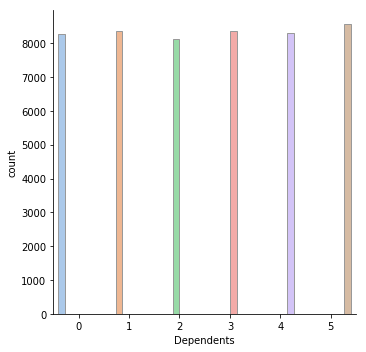

In [7]:
Dependents_Vector = DataSet["Dependents"]

Dep_greater_than_zero = [dependents for dependents in Dependents_Vector if dependents>0]

Dep_greater_than_zero_count = len(Dep_greater_than_zero)

print("number of families with dependents > 0 = ",Dep_greater_than_zero_count) #b.number of families with dependents > 0

sns.catplot(x="Dependents", hue="Dependents", kind="count",
            palette="pastel", edgecolor=".6",
            data=DataSet);

number of single entities =  12391
number of married entities =  37609


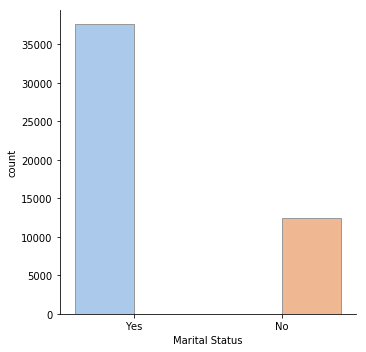

In [8]:
Marital_Status_Vector = DataSet["Marital Status"]

Single_Entities = [status for status in Marital_Status_Vector if status == "No"]

Single_Entities_count = len(Single_Entities)

print("number of single entities = ",Single_Entities_count) #c.number of single entities (same as the f question)

Married_Entities_count = Size - Single_Entities_count

print("number of married entities = ",Married_Entities_count) #c.number of married entities (same as the f question)

sns.catplot(x="Marital Status", hue="Marital Status", kind="count",
            palette="pastel", edgecolor=".6",
            data=DataSet);

In [9]:
Entity_Income_Vector = DataSet["Entity's Income in INR"]

Entitiy_Avg_Income = stats.mean(Entity_Income_Vector)

print("Entity's average income in INR = ",Entitiy_Avg_Income)  #d. Entity's average income in INR

Entity's average income in INR =  27416.1


In [10]:
Entity_Family_Income_Vector = DataSet["Entity's Family Income in INR"]

Entity_Family_Avg_Income = stats.mean(Entity_Family_Income_Vector)

print("Entity's family's average income in INR = ",Entity_Family_Avg_Income) #e. Entity's family's average income in INR

Entity's family's average income in INR =  264168.92


number of uneducated entities =  6232
number of educated entities =  43768


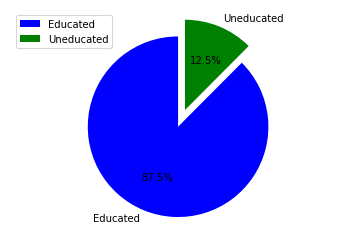

In [11]:
Education_Vector = DataSet["Education"]

Uneducated_Entities = [status for status in Education_Vector if status == "Not Educated"]

Uneducated_Entities_count = len(Uneducated_Entities)

print("number of uneducated entities = ",Uneducated_Entities_count) #g.number of uneducated entities

Educated_Entities_count = Size - Uneducated_Entities_count

print("number of educated entities = ",Educated_Entities_count) #g.number of educated entities

labels = ["Educated","Uneducated"]
sizes = [Educated_Entities_count,Uneducated_Entities_count]
colors = ["blue","green"]
explode = (0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

number of Entities at the end of the year that can make savings financially =  44671
number of Entities at the end of the year that break even financially =  897
number of Entities at the end of the year that may need a loan financially =  4432


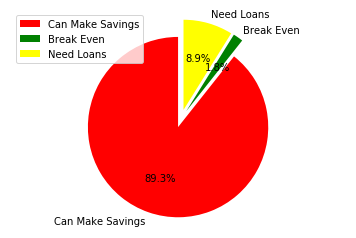

In [12]:
Avg_Exp_perMonth_perEntity_Vector = DataSet["Average Expenditure per Entity per Month in INR"]

Savings = list()
Entity_Savings = list()
Savings_count = 0
Break_Even_count = 0
Loan_Needed_count = 0
for i in range(Size):
    Savings.append(12*(Entity_Family_Income_Vector[i] - Dependents_Vector[i]*Avg_Exp_perMonth_perEntity_Vector[i]))
    Entity_Savings.append(12*(Entity_Income_Vector[i] - Avg_Exp_perMonth_perEntity_Vector[i]))
    if Entity_Savings[i] > 0:
        Savings_count+=1
    elif Entity_Savings[i] == 0:
        Break_Even_count+=1
    else:
        Loan_Needed_count+=1

print("number of Entities at the end of the year that can make savings financially = ",Savings_count) #h. number of Entities at the end of the year that can make savings financially

print("number of Entities at the end of the year that break even financially = ",Break_Even_count) #i. number of Entities at the end of the year that break even financially

print("number of Entities at the end of the year that may need a loan financially = ",Loan_Needed_count) #j. number of Entities at the end of the year that may need a loan financially

labels = ["Can Make Savings","Break Even","Need Loans"]
sizes = [Savings_count,Break_Even_count,Loan_Needed_count]
colors = ["red","green","yellow"]
explode = (0.1,0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

50000
Number of people whose economic status is Excellent =  19669
Number of people whose economic status is Good =  13297
Number of people whose economic status is Moderate =  11041
Number of people whose economic status is Average =  5025
Number of people whose economic status is Poor =  968


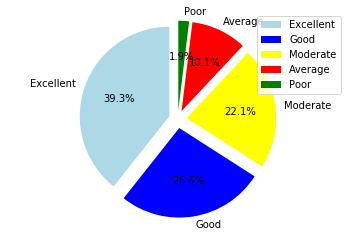

In [13]:
#Categorize every entity_id economic status as Excellent, Good, Moderate, Average, Poor
#Excellent range = 3500000 and more
#Good range = 2000000 to 3500000
#Moderate range = 750000 to 2000000
#Average range = 50000 to 750000
#Poor range = 50000 and less
Entity_ID_Vector = DataSet["Entity ID"]

Economic_status = dict()
Excellent_count = 0
Good_count = 0
Moderate_count = 0
Average_count = 0
Poor_count = 0
for i in range(Size):
    if Savings[i] >= 3500000:
        Economic_status[Entity_ID_Vector[i]] = "Excellent"
        Excellent_count+=1
    elif Savings[i] >= 2000000:
        Economic_status[Entity_ID_Vector[i]] = "Good"
        Good_count+=1
    elif Savings[i] >= 750000:
        Economic_status[Entity_ID_Vector[i]] = "Moderate"
        Moderate_count+=1
    elif Savings[i] >= 50000:
        Economic_status[Entity_ID_Vector[i]] = "Average"
        Average_count+=1
    else:
        Economic_status[Entity_ID_Vector[i]] = "Poor"
        Poor_count+=1

print(len(Economic_status)) #n. Categorize every entity_id economic status
print("Number of people whose economic status is Excellent = ",Excellent_count)
print("Number of people whose economic status is Good = ",Good_count)
print("Number of people whose economic status is Moderate = ",Moderate_count)
print("Number of people whose economic status is Average = ",Average_count)
print("Number of people whose economic status is Poor = ",Poor_count)

labels = ["Excellent","Good","Moderate","Average","Poor"]
sizes = [Excellent_count,Good_count,Moderate_count,Average_count,Poor_count]
colors = ["lightblue","blue","yellow","red","green"]
explode = (0.1,0.1,0.1,0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

number of Entities that can afford car loans =  44007


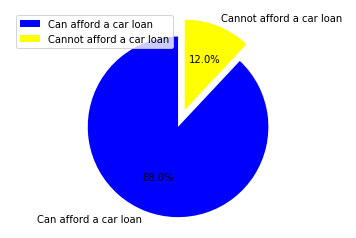

In [14]:
Car_Loan_count = 0
for i in range(Size):
    if Economic_status[i] == "Moderate" or Economic_status[i] == "Good" or Economic_status[i] == "Excellent":
        Car_Loan_count+=1
    else:
        pass
print("number of Entities that can afford car loans = ",Car_Loan_count) #k. number of Entities that can afford car loans

No_Car_Loan_count = Size - Car_Loan_count
labels = ["Can afford a car loan","Cannot afford a car loan"]
sizes = [Car_Loan_count,No_Car_Loan_count]
colors = ["blue","yellow"]
explode = (0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

number of Entities that can afford home loans =  32966


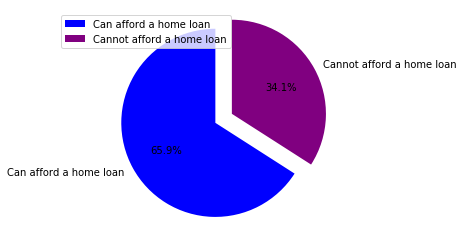

In [15]:
Home_Loan_count = 0
for i in range(Size):
    if Economic_status[i] == "Good" or Economic_status[i] == "Excellent":
        Home_Loan_count+=1
    else:
        pass
print("number of Entities that can afford home loans = ",Home_Loan_count) #l. number of Entities that can afford home loans

No_Home_Loan_count = Size - Home_Loan_count
labels = ["Can afford a home loan","Cannot afford a home loan"]
sizes = [Home_Loan_count,No_Home_Loan_count]
colors = ["blue","purple"]
explode = (0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

number of Entities that can be adviced on savings and loans =  44007


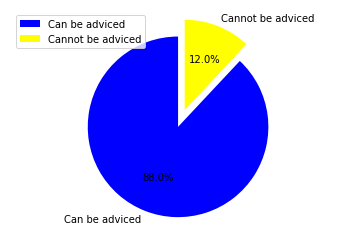

In [16]:
#Entities whose economic status that range above 'Moderate' can be adviced on savings and loans as they will have enough saved to get a loan
Advice_count = 0
for i in range(Size):
    if not (Economic_status[i] == "Poor" or Economic_status[i] == "Average"):
        Advice_count+=1
    else:
        pass
print("number of Entities that can be adviced on savings and loans = ",Advice_count) #m. Number of Entities can be advised on Savings and Loans


No_Advice_count = Size - Advice_count
labels = ["Can be adviced","Cannot be adviced"]
sizes = [Advice_count,No_Advice_count]
colors = ["blue","yellow"]
explode = (0.1,0.1)
Pie_Plot(labels,sizes,colors,explode)

In [17]:
Economic_Status_DataSet = DataSet
Economic_Status_DataSet["Economic Status"] = Economic_status.values()

In [18]:
Economic_Status_DataSet

,Unnamed: 0,Entity ID,Gender,Marital Status,Dependents,Education,Entity's Income in INR,Entity's Family Income in INR,City Type,Average Expenditure per Entity per Month in INR,Economic Status
0,0,0,Female,Yes,4,PG,11000,43000,A,15000,Poor
1,1,1,Male,Yes,0,Ph.d,31000,303000,B,10000,Excellent
2,2,2,Male,Yes,3,UG,12000,398000,B,10000,Excellent
3,3,3,Female,Yes,0,Not Educated,11000,260000,A,15000,Good
4,4,4,Male,No,4,Ph.d,8000,306000,B,10000,Good
5,5,5,Male,Yes,0,PG,31000,64000,B,10000,Moderate
6,6,6,Male,Yes,3,Ph.d,19000,91000,C,5000,Moderate
7,7,7,Male,Yes,2,Ph.d,17000,301000,C,5000,Good
8,8,8,Male,Yes,3,Ph.d,12000,192000,B,10000,Moderate
9,9,9,Male,Yes,3,Ph.d,7000,17000,A,15000,Poor


In [19]:
Economic_Status_DataSet.to_csv("Economic Status DataSet.csv")